In [1]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
from patsy import dmatrix

In [8]:
dmatrix("survived + pclass + age + 0", titanic)


DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

연습문제 4.1.1

In [15]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["target"] = housing.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [17]:
sns.pairplot(df[["target", "HouseAge", "AveRooms", "AveBedrms", "Population"]])
plt.show()

In [11]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

In [14]:
w

array(15.89695836)

연습문제 4.1.2

In [23]:
def make_regression2(n_samples, bias, noise, random_state=0):
    np.random.seed(random_state)
    X = np.random.normal(size=n_samples)
    w = 100 * np.random.normal(size=1)
    y0 = X * w + bias
    e = np.random.normal(scale=noise, size=n_samples)
    y = y0 + e
    return X, y, w

In [24]:
X, y, w = make_regression2(50, 100, 10)

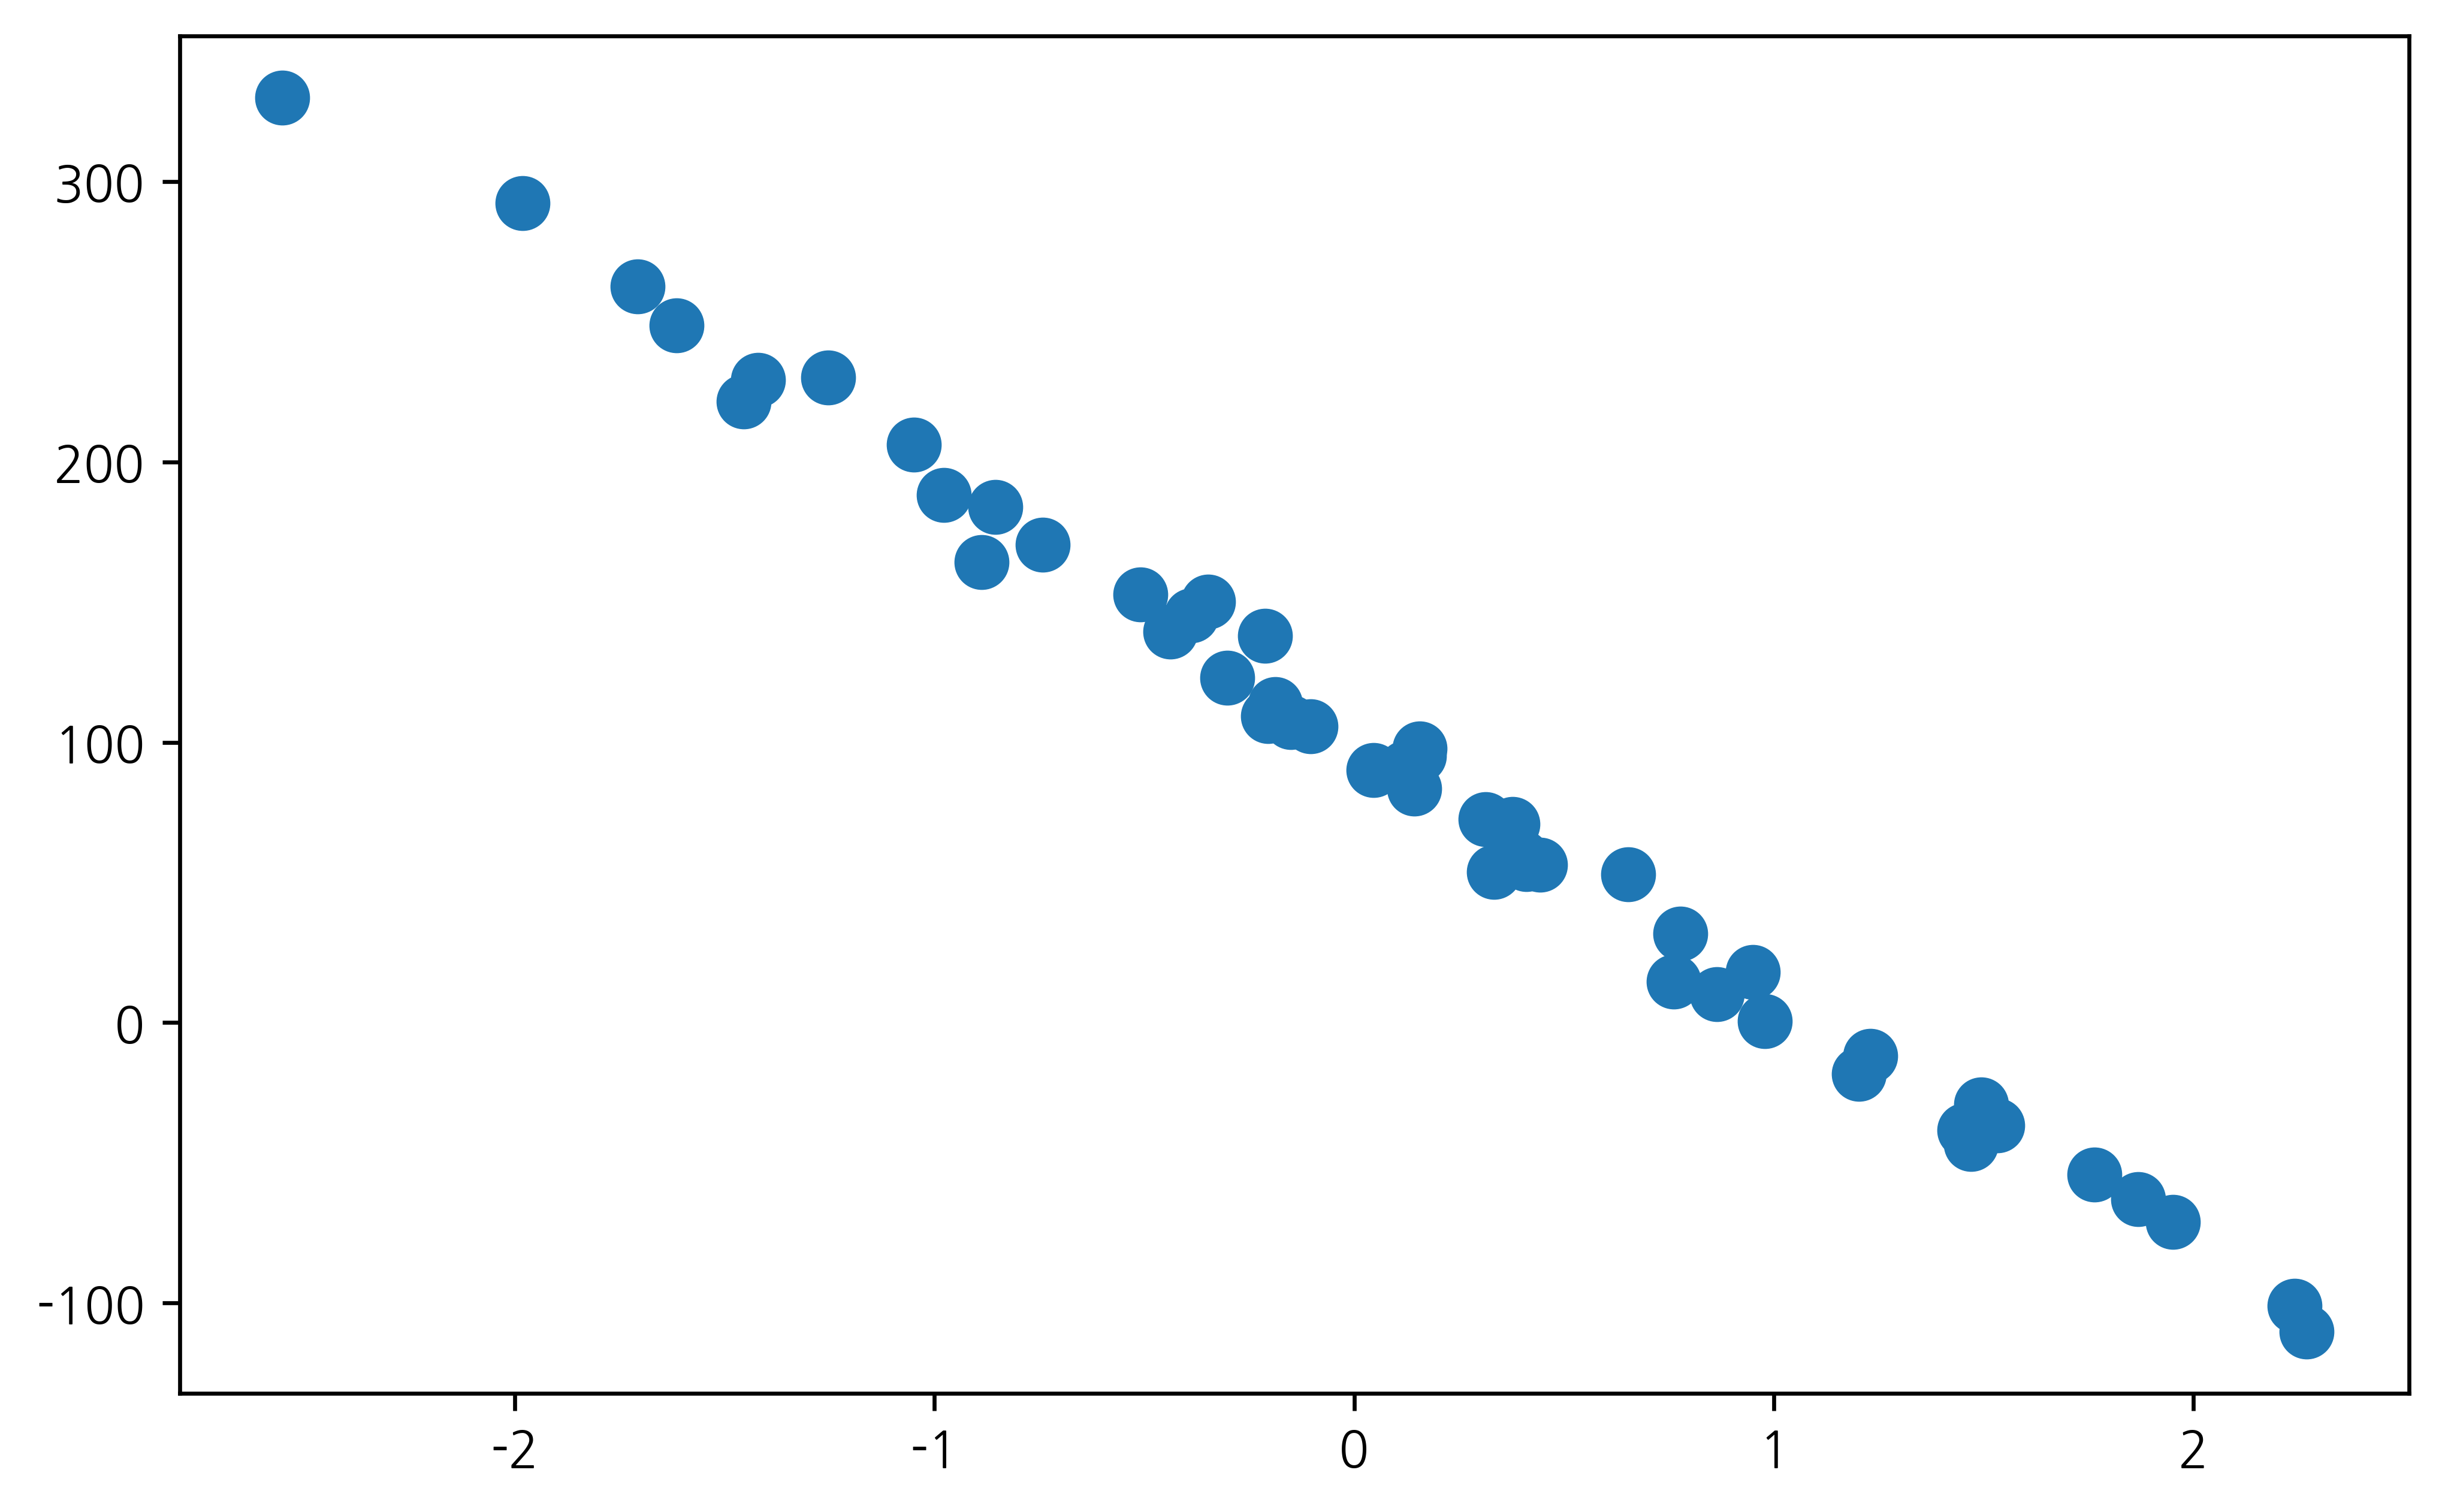

In [25]:
plt.scatter(X, y, s=100)
plt.show()

stats models 선형회귀분석 실습

첫 번째 방법
 - 첫 번째 방법을 더욱 추천

In [2]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [3]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [4]:
model = sm.OLS.from_formula("y~x", data=df)
result = model.fit()

In [6]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 12 May 2020   Prob (F-statistic):          8.17e-182
Time:                        19:37:03   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

두 번째 방법

In [ ]:
dfy = df[["y"]]
dfx = sm.add_constant(df[["x"]])`
model = sm.OLS(dfy, dfX)
result = model.fit()

당뇨 데이터로 예측하기

In [20]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(diabetes.target, columns=["MEDV"])

model_diabetes2 = sm.OLS(dfy, dfX)
result_diabetes2 = model_diabetes2.fit()
print(result_diabetes2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 12 May 2020   Prob (F-statistic):           3.83e-62
Time:                        20:02:41   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0